In [38]:
import pandas as pd
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import struct

In [11]:
metadata = pd.read_csv('./metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [16]:
print(metadata["class"].value_counts())

drilling            1000
street_music        1000
children_playing    1000
jackhammer          1000
engine_idling       1000
dog_bark            1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64


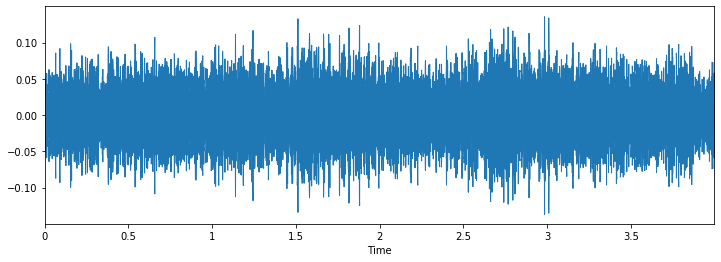

In [23]:
filename = './audio/fold1/177621-0-0-0.wav'
plt.figure(figsize=(12,4))
data,sample_rate = librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)

In [24]:
for index, row in metadata.iterrows():
    print(index, row)
    break;

0 slice_file_name    100032-3-0-0.wav
fsID                         100032
start                             0
end                        0.317551
salience                          1
fold                              5
classID                           3
class                      dog_bark
Name: 0, dtype: object


In [47]:
audiodata = []
for index, row, in metadata.iterrows():
    file_name = os.path.join(os.path.abspath("./audio")
                            , 'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    wave_file = open(file_name, "rb")
    
    riff = wave_file.read(12)
    fmt = wave_file.read(36)
    
    num_channels_string = fmt[10:12]
    num_channels = struct.unpack('<H', num_channels_string)[0]
    
    sample_rate_string = fmt[12:16]
    sample_rate = struct.unpack("<I", sample_rate_string)[0]
    
    bit_depth_string = fmt[22:24]
    bit_depth = struct.unpack("<H", bit_depth_string)[0]
    
    audiodata.append((num_channels, sample_rate, bit_depth))
    
audiodf = pd.DataFrame(audiodata, columns=["num_channels", "sample_rate", "bit_depth"])

In [51]:
audiodf.num_channels.value_counts(normalize=True)

2    0.915369
1    0.084631
Name: num_channels, dtype: float64

In [52]:
audiodf.sample_rate.value_counts(normalize=True)

44100     0.614979
48000     0.286532
96000     0.069858
24000     0.009391
16000     0.005153
22050     0.005039
11025     0.004466
192000    0.001947
8000      0.001374
11024     0.000802
32000     0.000458
Name: sample_rate, dtype: float64

In [53]:
audiodf.bit_depth.value_counts(normalize=True)

16    0.659414
24    0.315277
32    0.019354
8     0.004924
4     0.001031
Name: bit_depth, dtype: float64